In [6]:
import src.paths

In [7]:
date = '2022-09-16'

In [3]:
channel = 160

In [74]:
path = src.paths.DATA / date / f'{date}-hpc-spikes.pkl'
spikes = pd.read_pickle(path)

In [75]:
path = src.paths.DATA / date / f'{date}-hpc-csd.pkl'
csd = pd.read_pickle(path)

In [76]:
spikes_160 = spikes.loc[:, 160:163]
csd_160 = csd.loc[:, 40]

In [77]:
def isolate_notch(X, f=8, q=1):
    b, a = scipy.signal.iirnotch(f, q, 1250)
    y = scipy.signal.filtfilt(b, a, X)
    return X - y

In [104]:
start = 609
end = 611

In [107]:
x = csd_160.loc[start:end - 1 / 1250]

In [120]:
x_4 = isolate_notch(x, f=4, q=1)
x_8 = isolate_notch(x, f=8, q=1)
x_12 = isolate_notch(x, f=12, q=1)

In [121]:
y_4 = np.angle(scipy.signal.hilbert(x_4))
y_8 = np.angle(scipy.signal.hilbert(x_8))
y_12 = np.angle(scipy.signal.hilbert(x_12))

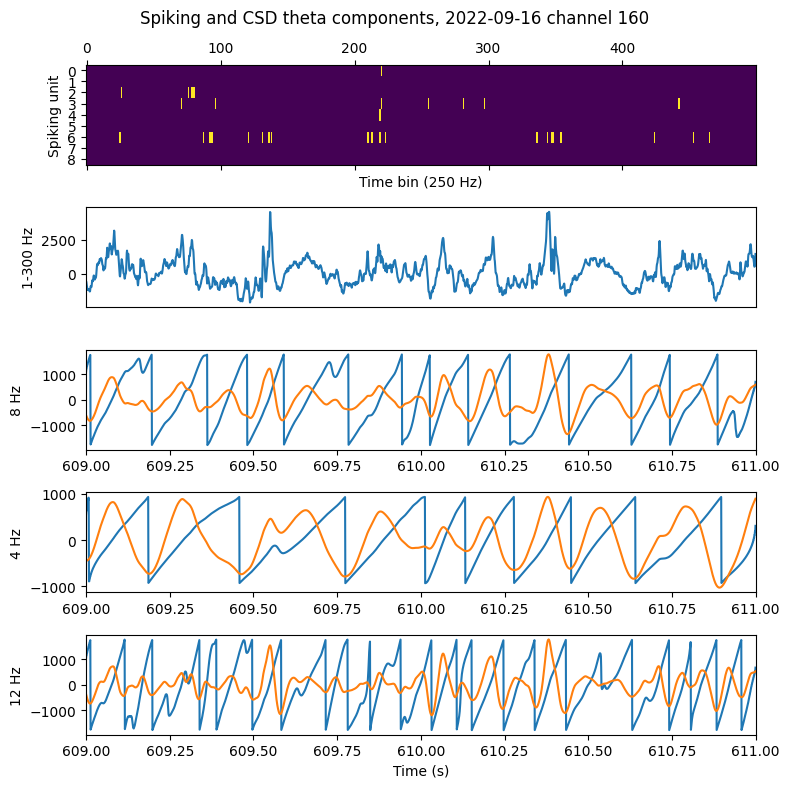

In [140]:
fig, ax = plt.subplots(5, 1, figsize=(8, 8))
plt.suptitle(f'Spiking and CSD theta components, {date} channel {channel}')
plt.sca(ax[1])
plt.plot(x)
plt.ylabel('1-300 Hz')
plt.xlim([start, end])
plt.xticks([])
plt.sca(ax[3])
plt.plot(x_4.index, y_4 / np.pi * x_4.max())
plt.plot(x_4)
plt.ylabel('4 Hz')
plt.xlim([start, end])
plt.sca(ax[2])
plt.plot(x_8.index, y_8 / np.pi * x_8.max())
plt.plot(x_8)
plt.ylabel('8 Hz')
plt.xlim([start, end])
plt.sca(ax[4])
plt.plot(x_12.index, y_12 / np.pi * x_12.max())
plt.plot(x_12)
plt.ylabel('12 Hz')
plt.xlabel('Time (s)')
plt.xlim([start, end])
plt.sca(ax[0])
plt.gca().matshow(spikes_160.loc[start:end - 1 / 250].T, vmin=0, vmax=1)
plt.ylabel('Spiking unit')
plt.xlabel('Time bin (250 Hz)')
plt.axis('auto')
plt.tight_layout()
plt.savefig(f'spiking-csd-theta-components-{date}-channel-{channel}.png', dpi=300)
plt.show()